# Part 2. Tweets Analysis
<br>

# 1. Load the Tweets
<br>

In [1]:
# -- Import Libraries
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import Word,TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
import re
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# -- Load the csv files into one dataframe
deliveroo = pd.read_csv('Deliveroo_final.csv')
justeat = pd.read_csv('justeat_final.csv')


# -- Check the shape of the dataframe
print('Data sahpe of devlieroo:',deliveroo.shape)
print('Data sahpe of justeat:',justeat.shape)

Data sahpe of devlieroo: (5400, 19)
Data sahpe of justeat: (3163, 19)


In [3]:
#-- Creat a sub dataset only containing text

# -- Load the Deliveroo Tweets
d_tweets = deliveroo.drop(['Unnamed: 0','ID','Name','Verified','description', 'location',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'lang','retweet_count',
       'hastages', 'source', 'favorite_count'], axis = 1)
d_tweets['cleaned_text'] = d_tweets['text']

# -- Drop duplicated rows
d_tweets = d_tweets.drop_duplicates()
print('data shape:',d_tweets.shape)

data shape: (4576, 4)


In [4]:
# -- Convert created_at into Timeseries of an hour
d_tweets['created_at'] = pd.to_datetime(d_tweets['created_at'])
d_tweets['timestamp'] =d_tweets['created_at']

d_tweets['timestamp']=d_tweets['created_at'].dt.round('H')

In [5]:
print('dataframe of develiroo')
d_tweets.head()

dataframe of develiroo


Screen_name                created_at  \
0  FromoutsideAlan 2022-04-07 23:57:36+00:00   
1  PaulPhi14275655 2022-04-07 23:49:42+00:00   
2        Shekkkk__ 2022-04-07 23:43:23+00:00   
3    charlisfavhoe 2022-04-07 23:38:50+00:00   
4      mp4rodrigos 2022-04-07 23:38:08+00:00   

                                                text  \
0  @Sean________67 @5fluffybutts But, if you had ...   
1  RT @plutus: Plutus now offers 20+ new and amaz...   
2  Sorry deliveroo &amp; them would really be in ...   
3                    @mp4rodrigos EHO USES DELIVEROO   
4      @charlisfavhoe Fuck deliveroo i am so serious   

                                        cleaned_text                 timestamp  
0  @Sean________67 @5fluffybutts But, if you had ... 2022-04-08 00:00:00+00:00  
1  RT @plutus: Plutus now offers 20+ new and amaz... 2022-04-08 00:00:00+00:00  
2  Sorry deliveroo &amp; them would really be in ... 2022-04-08 00:00:00+00:00  
3                    @mp4rodrigos EHO USES DELIVEROO 2022-04-08 00:00:00+00:00  
4      @charlisfavhoe Fuck deliveroo i am so serious 2022-04-08 00:00:00+00:00

In [6]:
# -- Justeat Tweets
j_tweets = justeat.drop(['Unnamed: 0','ID','Name','Verified','description', 'location',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'lang','retweet_count',
       'hastages', 'source', 'favorite_count'], axis = 1)
j_tweets['cleaned_text'] = j_tweets['text']

# -- Drop duplicated rows
j_tweets = j_tweets.drop_duplicates()

In [7]:
# -- Convert created_at into Timeseries of an hour
j_tweets['created_at'] = pd.to_datetime(j_tweets['created_at'])
j_tweets['timestamp'] =j_tweets['created_at']

j_tweets['timestamp']=j_tweets['created_at'].dt.round('H')


print('dataframe of Justeat')
j_tweets.head(5)

dataframe of Justeat


Screen_name                created_at  \
0   BraYSoSirius 2022-04-07 23:49:06+00:00   
1  TiernanDouieb 2022-04-13 10:01:04+00:00   
2        svnkrmr 2022-04-13 12:32:11+00:00   
3    UrbanPlayUK 2022-04-13 16:35:07+00:00   
4      lewwmac94 2022-04-13 17:27:10+00:00   

                                                text  \
0  @jxhnwae Is this available on https://t.co/2mC...   
1  Loads of Just Eat delivery drivers are now par...   
2  Three European food delivery stocks, Delivery ...   
3  Feeling lazy? We gotchu 👊\n\nOrder directly fr...   
4  Do you ever get tempted to mug a justeat drive...   

                                        cleaned_text                 timestamp  
0  @jxhnwae Is this available on https://t.co/2mC... 2022-04-08 00:00:00+00:00  
1  Loads of Just Eat delivery drivers are now par... 2022-04-13 10:00:00+00:00  
2  Three European food delivery stocks, Delivery ... 2022-04-13 13:00:00+00:00  
3  Feeling lazy? We gotchu 👊\n\nOrder directly fr... 2022-04-13 17:00:00+00:00  
4  Do you ever get tempted to mug a justeat drive... 2022-04-13 17:00:00+00:00

# <br>
# 2. Data Preprocessing
<br>

In [8]:
# -- Data Preprocessing using nltk 
# -- Setting up default and customized stopword lists 
stop_words = stopwords.words("english")
custom_stopwords = ['deliveroo','Deliveroo','DeliverooHelp','sorry','thank','hi','hey''food','eat','justeat','JustEat','rt']


In [9]:
# -- Clean the text, removing special characters, RT
# -- Convert text into lower case

# -- Cleaning for deliveroo tweets
remove_rt = lambda x: re.sub('RT @\w+: &'," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
d_tweets["cleaned_text"] = d_tweets.cleaned_text.map(remove_rt).map(rt)
d_tweets["cleaned_text"] = d_tweets.cleaned_text.str.lower()


# -- Cleaning for justeat tweets
remove_rt = lambda x: re.sub('RT @\w+: &'," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
j_tweets["cleaned_text"] = j_tweets.cleaned_text.map(remove_rt).map(rt)
j_tweets["cleaned_text"] = j_tweets.cleaned_text.str.lower()

In [10]:
# -- Creat a function to remove stopwords
def preprocess_tweets(tweet,custom_stopwords):
    preprocessed_tweets = tweet
    preprocessed_tweets = " ".join (word for word in preprocessed_tweets.split() if word not in stop_words)
    preprocessed_tweets = " ".join (word for word in preprocessed_tweets.split() if word not in custom_stopwords)
    preprocessed_tweets = " ".join (Word(word).lemmatize() for word in preprocessed_tweets.split())
    return   preprocessed_tweets

In [11]:
# -- Utilize the preprocess_tweets function to remove stopwords

d_tweets['cleaned_text'] = d_tweets['cleaned_text'].apply(lambda x: preprocess_tweets (x, custom_stopwords))
j_tweets['cleaned_text'] = j_tweets['cleaned_text'].apply(lambda x: preprocess_tweets (x, custom_stopwords))

In [12]:
d_tweets.head()

Screen_name                created_at  \
0  FromoutsideAlan 2022-04-07 23:57:36+00:00   
1  PaulPhi14275655 2022-04-07 23:49:42+00:00   
2        Shekkkk__ 2022-04-07 23:43:23+00:00   
3    charlisfavhoe 2022-04-07 23:38:50+00:00   
4      mp4rodrigos 2022-04-07 23:38:08+00:00   

                                                text  \
0  @Sean________67 @5fluffybutts But, if you had ...   
1  RT @plutus: Plutus now offers 20+ new and amaz...   
2  Sorry deliveroo &amp; them would really be in ...   
3                    @mp4rodrigos EHO USES DELIVEROO   
4      @charlisfavhoe Fuck deliveroo i am so serious   

                                        cleaned_text                 timestamp  
0  67 serious health emergency would care driving... 2022-04-08 00:00:00+00:00  
1  plutus offer 20 new amazing perk enjoy 100 reb... 2022-04-08 00:00:00+00:00  
2  amp would really bag let order multiple restau... 2022-04-08 00:00:00+00:00  
3                                             eho us 2022-04-08 00:00:00+00:00  
4                                       fuck serious 2022-04-08 00:00:00+00:00

# <br>
# 3. Sentiment Analysis (Deliveroo vs. JustEat)
<br>

# Investigation brand: Deliveroo

In [13]:
# -- Use TextBlob to detect the sentiment of tweets
# -- Add two columns, polarity and subjectivity

d_tweets[['polarity', 'subjectivity']] = d_tweets['cleaned_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [14]:
# -- A quick overview of the polarity and subjetivity of the collected tweets

print('Summary Result for Deliveroo')
d_tweets[['polarity','subjectivity']].agg([np.mean,np.max,np.min])

Summary Result for Deliveroo


polarity  subjectivity
mean -0.009834      0.340294
amax  1.000000      1.000000
amin -1.000000      0.000000

In [15]:
d_tweets.head()

Screen_name                created_at  \
0  FromoutsideAlan 2022-04-07 23:57:36+00:00   
1  PaulPhi14275655 2022-04-07 23:49:42+00:00   
2        Shekkkk__ 2022-04-07 23:43:23+00:00   
3    charlisfavhoe 2022-04-07 23:38:50+00:00   
4      mp4rodrigos 2022-04-07 23:38:08+00:00   

                                                text  \
0  @Sean________67 @5fluffybutts But, if you had ...   
1  RT @plutus: Plutus now offers 20+ new and amaz...   
2  Sorry deliveroo &amp; them would really be in ...   
3                    @mp4rodrigos EHO USES DELIVEROO   
4      @charlisfavhoe Fuck deliveroo i am so serious   

                                        cleaned_text  \
0  67 serious health emergency would care driving...   
1  plutus offer 20 new amazing perk enjoy 100 reb...   
2  amp would really bag let order multiple restau...   
3                                             eho us   
4                                       fuck serious   

                  timestamp  polarity  subjectivity  
0 2022-04-08 00:00:00+00:00 -0.333333      0.666667  
1 2022-04-08 00:00:00+00:00  0.284091      0.488636  
2 2022-04-08 00:00:00+00:00  0.100000      0.100000  
3 2022-04-08 00:00:00+00:00  0.000000      0.000000  
4 2022-04-08 00:00:00+00:00 -0.366667      0.633333

In [16]:
# -- Generateing a dataframe for tweets polarity and timestamp

realtime_df = d_tweets[['created_at','polarity']]
realtime_df = realtime_df.sort_values(by = 'created_at',ascending = True)
realtime_df['MA polatiry'] = realtime_df.polarity.rolling(10,min_periods = 3).mean()

In [17]:
realtime_df.head()

created_at  polarity  MA polatiry
999 2022-04-06 11:41:28+00:00  0.000000          NaN
998 2022-04-06 11:44:40+00:00  0.000000          NaN
997 2022-04-06 11:45:59+00:00  0.318182     0.106061
996 2022-04-06 11:47:36+00:00  0.000000     0.079545
995 2022-04-06 11:47:38+00:00  0.000000     0.063636

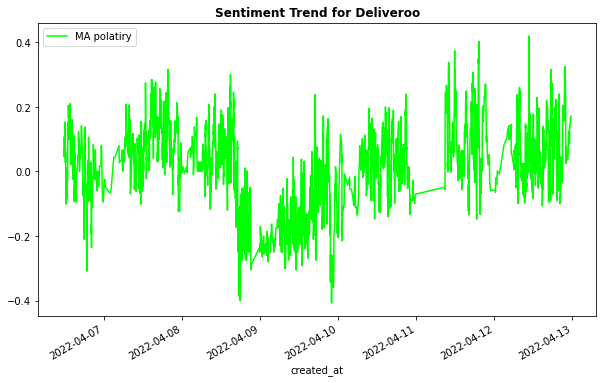

In [18]:
realtime_df.plot(x = 'created_at', y = 'MA polatiry',figsize = (10,6), color = 'lime')
plt.title('Sentiment Trend for Deliveroo',fontweight='bold')
font = {'family' : 'serif',
        'weight' : 'normal',
        'size' : 12}

plt.rc('font', **font)

In [19]:
#-- Calculating Negative, Positive, Neutral and Compound values

for index, row in d_tweets['cleaned_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        d_tweets.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        d_tweets.loc[index, 'sentiment'] = "positive"
    else:
        d_tweets.loc[index, 'sentiment'] = "neutral"
    d_tweets.loc[index, 'neg'] = neg
    d_tweets.loc[index, 'neu'] = neu
    d_tweets.loc[index, 'pos'] = pos
    d_tweets.loc[index, 'compound'] = comp

d_tweets.head(10)

Screen_name                created_at  \
0  FromoutsideAlan 2022-04-07 23:57:36+00:00   
1  PaulPhi14275655 2022-04-07 23:49:42+00:00   
2        Shekkkk__ 2022-04-07 23:43:23+00:00   
3    charlisfavhoe 2022-04-07 23:38:50+00:00   
4      mp4rodrigos 2022-04-07 23:38:08+00:00   
5    Cattle_Steaks 2022-04-07 23:29:13+00:00   
6      KyronBaxter 2022-04-07 23:27:46+00:00   
7    LisaS33992989 2022-04-07 23:23:09+00:00   
8  Darragh_Scanlon 2022-04-07 23:18:36+00:00   
9  LadyCryptoClown 2022-04-07 23:16:25+00:00   

                                                text  \
0  @Sean________67 @5fluffybutts But, if you had ...   
1  RT @plutus: Plutus now offers 20+ new and amaz...   
2  Sorry deliveroo &amp; them would really be in ...   
3                    @mp4rodrigos EHO USES DELIVEROO   
4      @charlisfavhoe Fuck deliveroo i am so serious   
5  For those looking for decent food to be delive...   
6  @Kasimnova @libsoftiktok Remember when £100 wo...   
7  @FiveGuysUK @reeses @Deliveroo It's very conce...   
8  Considering a career path as a deliveroo cycli...   
9  RT @plutus: Plutus now offers 20+ new and amaz...   

                                        cleaned_text  \
0  67 serious health emergency would care driving...   
1  plutus offer 20 new amazing perk enjoy 100 reb...   
2  amp would really bag let order multiple restau...   
3                                             eho us   
4                                       fuck serious   
5  looking decent food delivered got covered take...   
6  remember 100 would got far even cover two peop...   
7  concerning senior food safety specialist suppo...   
8                    considering career path cyclist   
9  plutus offer 20 new amazing perk enjoy 100 reb...   

                  timestamp  polarity  subjectivity sentiment    neg    neu  \
0 2022-04-08 00:00:00+00:00 -0.333333      0.666667  negative  0.322  0.413   
1 2022-04-08 00:00:00+00:00  0.284091      0.488636  positive  0.000  0.632   
2 2022-04-08 00:00:00+00:00  0.100000      0.100000   neutral  0.000  1.000   
3 2022-04-08 00:00:00+00:00  0.000000      0.000000   neutral  0.000  1.000   
4 2022-04-08 00:00:00+00:00 -0.366667      0.633333  negative  1.000  0.000   
5 2022-04-07 23:00:00+00:00  0.166667      0.666667   neutral  0.000  1.000   
6 2022-04-07 23:00:00+00:00  0.100000      1.000000   neutral  0.000  1.000   
7 2022-04-07 23:00:00+00:00  0.000000      0.000000  positive  0.000  0.476   
8 2022-04-07 23:00:00+00:00  0.000000      0.000000   neutral  0.000  1.000   
9 2022-04-07 23:00:00+00:00  0.284091      0.488636  positive  0.000  0.632   

     pos  compound  
0  0.264    0.0772  
1  0.368    0.7906  
2  0.000    0.0000  
3  0.000    0.0000  
4  0.000   -0.5859  
5  0.000    0.0000  
6  0.000    0.0000  
7  0.524    0.6705  
8  0.000    0.0000  
9  0.368    0.7906

In [20]:
# -- Store Negative,Positive,Neutral tweets in different dataframes

d_negative = d_tweets[d_tweets["sentiment"]=="negative"]
d_positive = d_tweets[d_tweets["sentiment"]=="positive"]
d_neutral = d_tweets[d_tweets["sentiment"]=="neutral"]

In [21]:
#-- Creating a function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

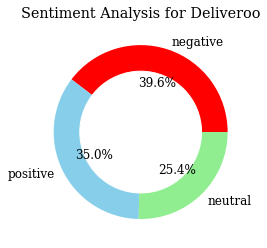

In [22]:
# -- Visualize sentiment distribution in the collected tweets
#--Create data for Donut Chart
pie = count_values_in_column(d_tweets,"sentiment")
names= pie.index
size=pie["Percentage"]

 
# --Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','skyblue','lightgreen'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis for Deliveroo')
font = {'family' : 'serif',
        'weight' : 'bold',
        'size' : 12}

plt.rc('font', **font)
plt.show()

# Comparison brand: JustEat

In [23]:
# -- Use TextBlob to detect the sentiment of tweets
# -- Add two columns, polarity and subjectivity

j_tweets[['polarity', 'subjectivity']] = j_tweets['cleaned_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


# -- A quick overview of the polarity and subjetivity of the collected tweets
print('Summary Result for JustEat')
j_tweets[['polarity','subjectivity']].agg([np.mean,np.max,np.min])

Summary Result for JustEat


polarity  subjectivity
mean  0.338573      0.336881
amax  1.000000      1.000000
amin -1.000000      0.000000

In [24]:
j_tweets.head()

Screen_name                created_at  \
0   BraYSoSirius 2022-04-07 23:49:06+00:00   
1  TiernanDouieb 2022-04-13 10:01:04+00:00   
2        svnkrmr 2022-04-13 12:32:11+00:00   
3    UrbanPlayUK 2022-04-13 16:35:07+00:00   
4      lewwmac94 2022-04-13 17:27:10+00:00   

                                                text  \
0  @jxhnwae Is this available on https://t.co/2mC...   
1  Loads of Just Eat delivery drivers are now par...   
2  Three European food delivery stocks, Delivery ...   
3  Feeling lazy? We gotchu 👊\n\nOrder directly fr...   
4  Do you ever get tempted to mug a justeat drive...   

                                        cleaned_text  \
0                                          available   
1  load delivery driver part longest gig economy ...   
2  three european food delivery stock delivery he...   
3  feeling lazy gotchu order directly butcher get...   
4                        ever get tempted mug driver   

                  timestamp  polarity  subjectivity  
0 2022-04-08 00:00:00+00:00  0.400000      0.400000  
1 2022-04-13 10:00:00+00:00  0.250000      1.000000  
2 2022-04-13 13:00:00+00:00 -0.083333      0.083333  
3 2022-04-13 17:00:00+00:00 -0.075000      0.700000  
4 2022-04-13 17:00:00+00:00  0.000000      0.000000

In [25]:
# -- Generateing a dataframe for tweets polarity and timestamp

realtime_df = j_tweets[['created_at','polarity']]
realtime_df = realtime_df.sort_values(by = 'created_at',ascending = True)
realtime_df['MA polatiry'] = realtime_df.polarity.rolling(10,min_periods = 3).mean()

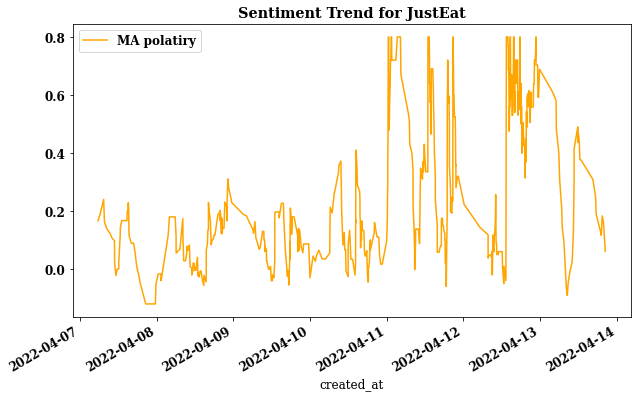

In [26]:
realtime_df.plot(x = 'created_at', y = 'MA polatiry',figsize = (10,6), color = 'orange')
plt.title('Sentiment Trend for JustEat',fontweight='bold')
font = {'family' : 'serif',
        'weight' : 'normal',
        'size' : 12}

plt.rc('font', **font)

In [27]:
#-- Calculating Negative, Positive, Neutral and Compound values
for index, row in j_tweets['cleaned_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        j_tweets.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        j_tweets.loc[index, 'sentiment'] = "positive"
    else:
        j_tweets.loc[index, 'sentiment'] = "neutral"
    j_tweets.loc[index, 'neg'] = neg
    j_tweets.loc[index, 'neu'] = neu
    j_tweets.loc[index, 'pos'] = pos
    j_tweets.loc[index, 'compound'] = comp
    
    
    
# -- Store Negative,Positive,Neutral tweets in different dataframes
j_negative = j_tweets[j_tweets["sentiment"]=="negative"]
j_positive = j_tweets[j_tweets["sentiment"]=="positive"]
j_neutral = j_tweets[j_tweets["sentiment"]=="neutral"]

j_tweets.head(10)

Screen_name                created_at  \
0     BraYSoSirius 2022-04-07 23:49:06+00:00   
1    TiernanDouieb 2022-04-13 10:01:04+00:00   
2          svnkrmr 2022-04-13 12:32:11+00:00   
3      UrbanPlayUK 2022-04-13 16:35:07+00:00   
4        lewwmac94 2022-04-13 17:27:10+00:00   
5       fromUlster 2022-04-13 17:37:55+00:00   
6     windsorp1886 2022-04-13 18:59:11+00:00   
7     PutDownPutin 2022-04-13 19:13:32+00:00   
8      idk_kiayaaa 2022-04-13 19:31:04+00:00   
9  RallierOfTroops 2022-04-13 19:54:51+00:00   

                                                text  \
0  @jxhnwae Is this available on https://t.co/2mC...   
1  Loads of Just Eat delivery drivers are now par...   
2  Three European food delivery stocks, Delivery ...   
3  Feeling lazy? We gotchu 👊\n\nOrder directly fr...   
4  Do you ever get tempted to mug a justeat drive...   
5  RT @BrorsDeli: 1st of April, Pay Day and Fryda...   
6  RT @BrorsDeli: 1st of April, Pay Day and Fryda...   
7  #justeat #JustEatTakeaway @JustEatUK @JustEatT...   
8  @sp00kybitchhh literally sitting refreshing th...   
9  @JustEatUK @JoshWaters10 Hey JustEat. Thanks f...   

                                        cleaned_text  \
0                                          available   
1  load delivery driver part longest gig economy ...   
2  three european food delivery stock delivery he...   
3  feeling lazy gotchu order directly butcher get...   
4                        ever get tempted mug driver   
5  1st april pay day frydayyyyyy friyayyyyyyy ser...   
6  1st april pay day frydayyyyyy friyayyyyyyy ser...   
7         justeattakeaway protest fuelprice fuel oil   
8           literally sitting refreshing app see way   
9  hey thanks getting back touch actually made so...   

                  timestamp  polarity  subjectivity sentiment    neg    neu  \
0 2022-04-08 00:00:00+00:00  0.400000      0.400000   neutral  0.000  1.000   
1 2022-04-13 10:00:00+00:00  0.250000      1.000000  positive  0.109  0.657   
2 2022-04-13 13:00:00+00:00 -0.083333      0.083333  positive  0.145  0.629   
3 2022-04-13 17:00:00+00:00 -0.075000      0.700000  negative  0.192  0.692   
4 2022-04-13 17:00:00+00:00  0.000000      0.000000   neutral  0.000  1.000   
5 2022-04-13 18:00:00+00:00  0.000000      0.000000  negative  0.097  0.903   
6 2022-04-13 19:00:00+00:00  0.000000      0.000000  negative  0.097  0.903   
7 2022-04-13 19:00:00+00:00  0.000000      0.000000  negative  0.333  0.667   
8 2022-04-13 20:00:00+00:00  0.500000      1.000000   neutral  0.000  1.000   
9 2022-04-13 20:00:00+00:00  0.066667      0.100000  positive  0.000  0.707   

     pos  compound  
0  0.000    0.0000  
1  0.234    0.4019  
2  0.226    0.3182  
3  0.115   -0.2500  
4  0.000    0.0000  
5  0.000   -0.1027  
6  0.000   -0.1027  
7  0.000   -0.2500  
8  0.000    0.0000  
9  0.293    0.4404

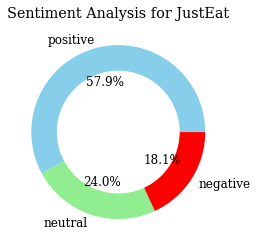

In [28]:
# -- Visualize sentiment distribution in the collected tweets
#--Create data for Donut Chart
pie = count_values_in_column(j_tweets,"sentiment")
names= pie.index
size=pie["Percentage"]

 
# --Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['skyblue','lightgreen','red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis for JustEat')
font = {'family' : 'serif',
        'weight' : 'bold',
        'size' : 12}

plt.rc('font', **font)
plt.show()


# <br>
# 4. Topic/Keyword Analysis
<br>

A. Word Cloud

In [29]:
# -- Creating a function to generate wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize = (15,12))
    plt.imshow(wordcloud)
    plt.axis('off')

Word Cloud of All Tweets


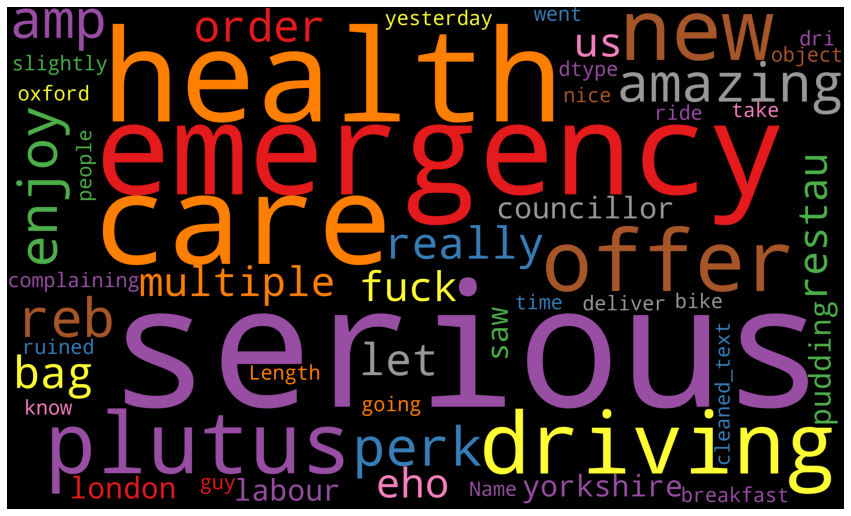

In [30]:
# -- Creating a wordcloud of the tweets

wordcloud = WordCloud(width = 3000,height = 1800,random_state = 30,background_color = 'black',
                     colormap = 'Set1',collocations = False,stopwords = STOPWORDS).generate(str(d_tweets['cleaned_text']))
plot_cloud(wordcloud)
print('Word Cloud of All Tweets')

Word Cloud of Positive Tweets


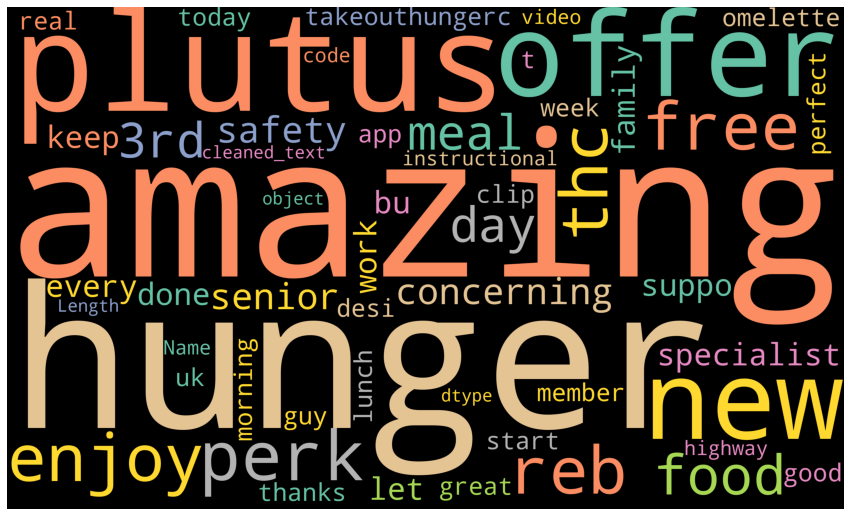

In [31]:
wordcloud = WordCloud(width = 3000,height = 1800,random_state = 28,background_color = 'black',
                     colormap = 'Set2',collocations = False,stopwords = STOPWORDS).generate(str(d_positive['cleaned_text']))
plot_cloud(wordcloud)
print('Word Cloud of Positive Tweets')

Word Cloud of Negative Tweets


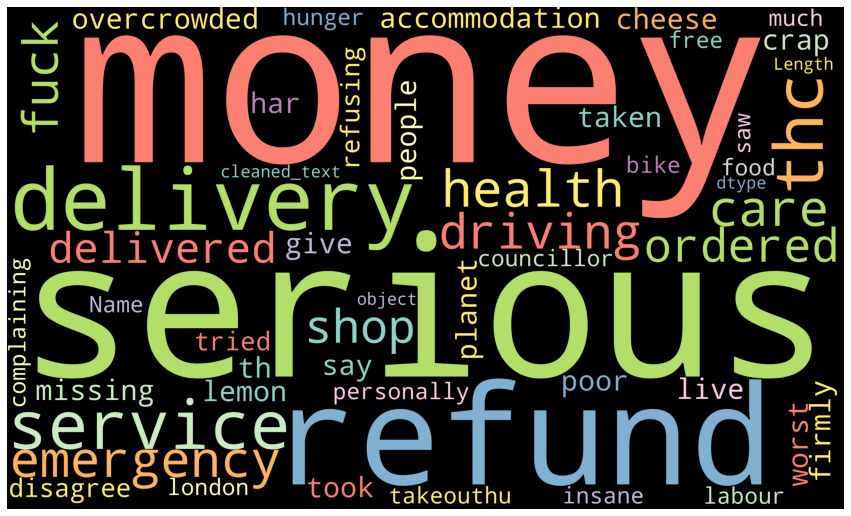

In [32]:
wordcloud = WordCloud(width = 3000,height = 1800,random_state = 32,background_color = 'black',
                     colormap = 'Set3',collocations = False,stopwords = STOPWORDS).generate(str(d_negative['cleaned_text']))
plot_cloud(wordcloud)
print('Word Cloud of Negative Tweets')

<br>
2. Word Frequency

In [33]:
# -- In order to calculate word frequency, some text cleansing is required 

# -- Text Preprocessing
# -- Step1: Remove words with len < 2
d_tweets['cleaned_text'] = d_tweets['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# -- Step2: Tokenization
d_tweets['cleaned_text'] = d_tweets.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


# -- Step3: Stemming
# -- Create a function to do stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

# -- Stemming the text
d_tweets['cleaned_text']= d_tweets['cleaned_text'].apply(lambda x: stemming_on_text(x))
d_tweets['cleaned_text'].head()


# -- Merge all the text into a list in order to count word frequency
content = d_tweets['cleaned_text'].sum()  

In [35]:
# -- Compute the word frequency using FreqDist
# -- Putting thre result into a dataframe

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

fdist = FreqDist(content)
fd = pd.DataFrame(fdist.most_common(10),                    
    columns = ["Word","Frequency"]).drop([0]).reindex()

In [36]:
# -- View the word freqency dataframe
fd

Word  Frequency
1   peopl       1141
2    need       1132
3    open       1132
4    stop       1115
5     let       1095
6  random       1083
7    type       1082
8    bird       1081
9    yard       1080

In [37]:
# -- Visualizing the word frequency by bar chart

fig = px.bar(fd, x="Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.update_layout(title_text='Deliveroo Word Frequency', title_x=0.5)
fig.show()

<br>
2. Most Retweeted Content
<br>

In [38]:
# -- Load the dataset including user ID, Name, Screen_name and original text,followers_count,statuses_count and Verified

topics = deliveroo.drop(['Unnamed: 0','Name','friends_count', 'listed_count',
       'favourites_count', 'lang',
       'hastages', 'source','retweet_count'], axis = 1)

topics.head(10)

ID      Screen_name  Verified  \
0             64171415  FromoutsideAlan     False   
1  1383034897938403328  PaulPhi14275655     False   
2           2491680219        Shekkkk__     False   
3  1449361103830540298    charlisfavhoe     False   
4  1363553691756867587      mp4rodrigos     False   
5   733729129858764800    Cattle_Steaks     False   
6  1205951918859857921      KyronBaxter     False   
7  1454954742438719488    LisaS33992989     False   
8  1152727351777726464  Darragh_Scanlon     False   
9  1357268241824047105  LadyCryptoClown     False   

                                         description                 location  \
0  Here to learn, especially the stuff I'm not su...                      NaN   
1                                                NaN                      NaN   
2                                               Bye.            South London    
3                                                NaN                      NaN   
4      olivia rodrigo and gracie abrams’ #1 defender          she¡her | 14 ♡    
5  Cattle. Steakhouse. Home of marinated Steaks, ...     Southampton, England   
6                                   IT Engineer 👨🏿‍💻           United Kingdom   
7  I love animals, advocate for them whenever I c...                      NaN   
8                       twilight new moon evangelist    17 • he/him • éire 🇮🇪   
9  Lawless, erratic, impulsive. Small town gal, s...  England, United Kingdom   

   followers_count  statuses_count                 created_at  \
0             1277           31532  2022-04-07 23:57:36+00:00   
1               19             153  2022-04-07 23:49:42+00:00   
2             2297           44237  2022-04-07 23:43:23+00:00   
3               64            1100  2022-04-07 23:38:50+00:00   
4              631            6623  2022-04-07 23:38:08+00:00   
5              352             545  2022-04-07 23:29:13+00:00   
6               37            1052  2022-04-07 23:27:46+00:00   
7              226            7195  2022-04-07 23:23:09+00:00   
8             2871           30745  2022-04-07 23:18:36+00:00   
9              429            1483  2022-04-07 23:16:25+00:00   

                                                text  favorite_count  
0  @Sean________67 @5fluffybutts But, if you had ...               0  
1  RT @plutus: Plutus now offers 20+ new and amaz...               0  
2  Sorry deliveroo &amp; them would really be in ...               1  
3                    @mp4rodrigos EHO USES DELIVEROO               0  
4      @charlisfavhoe Fuck deliveroo i am so serious               1  
5  For those looking for decent food to be delive...               0  
6  @Kasimnova @libsoftiktok Remember when £100 wo...               6  
7  @FiveGuysUK @reeses @Deliveroo It's very conce...               0  
8  Considering a career path as a deliveroo cycli...               0  
9  RT @plutus: Plutus now offers 20+ new and amaz...               0

In [39]:
# -- Preprocessing the text content using the same methods in previous analysis
# -- Remove special characters, RT.  Turning the text into lower case

topics['processed_tweets'] = topics['text']

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
topics['processed_tweets'] = topics.processed_tweets.map(remove_rt).map(rt)
topics['processed_tweets']  = topics.processed_tweets.str.lower()

In [40]:
# -- Find the most frequently Retweet content by counting the appearance of tweets
# -- Select top 5 tweets

top_RT = topics['processed_tweets'].value_counts().head(3)
top_RT = pd.DataFrame(top_RT)
    
top_RT

processed_tweets
 deliveroo need to stop letting random people o...              1288
 plutus now offers 20  new and amazing perks   ...               168
  50 voucher up for grabs   you can decide whet...               125

# <br>
# 5. Most Active Users (Deliveroo vs. JustEat)
<br>

A. Deliveroo

In [41]:
# --Deviding the users into Verified and unverified 
d_verified_user = topics[topics.Verified == True]
d_non_verified_user = topics[topics.Verified == False]

In [42]:
# -- Count the number of users in each type
count_verified_user = d_verified_user.Screen_name.nunique()
print('There are',count_verified_user,'verified users talking about Deliveroo.')

count_non_verified_user= d_non_verified_user.Screen_name.nunique()
print('There are',count_non_verified_user,'unverified users talking about Deliveroo.')

There are 103 verified users talking about Deliveroo.
There are 3594 unverified users talking about Deliveroo.


In [43]:
# Top 5 most active verified account 
active_verified_user = d_verified_user['Screen_name'].value_counts().head(5)
active_verified_user = pd.DataFrame(active_verified_user)
active_verified_user= active_verified_user.rename(columns = {"Screen_name": "count_of_post"})
print('Top 5 verified users of Deliveroo')
active_verified_user

Top 5 verified users of Deliveroo


count_of_post
DeliverooHelp            197
Deliveroo                109
pizzahutuk                 7
PizzaExpress               6
CityAM                     6

In [44]:
# Top 5 most active non- verified account 
active_unverified_user = d_non_verified_user['Screen_name'].value_counts().head(5)
active_unverified_user = pd.DataFrame(active_unverified_user)
active_unverified_user= active_unverified_user.rename(columns = {"Screen_name": "count_of_post"})
print('Top 5 non-verified users of Deliveroo')
active_unverified_user

Top 5 non-verified users of Deliveroo


count_of_post
goffys_preston             34
monaiisaaying              17
NzuchiTimesUSA             16
atomjnrD                   14
mimi_ah23                  13

<br>
<br>
B. JustEat

In [45]:
# --Deviding the users into Verified and unverified 
verified_user = justeat[justeat.Verified == True]
non_verified_user = justeat[justeat.Verified == False]

In [46]:
# -- Count the number of users in each type
count_verified_user = verified_user.Screen_name.nunique()
print('There are',count_verified_user,'verified users talking about JustEat.')

count_non_verified_user= non_verified_user.Screen_name.nunique()
print('There are',count_non_verified_user,'unverified users talking about JustEat.')

There are 11 verified users talking about JustEat.
There are 659 unverified users talking about JustEat.


In [47]:
# Top 5 most active verified account 
active_verified_user = verified_user['Screen_name'].value_counts().head(5)
active_verified_user = pd.DataFrame(active_verified_user)
active_verified_user= active_verified_user.rename(columns = {"Screen_name": "count_of_post"})
print('Top 5 verified users of JustEat')
active_verified_user

Top 5 verified users of JustEat


count_of_post
pizzahutuk                  24
siliconrepublic             21
JustEatUK                   19
JustEat_es                  10
myldn                        7

In [48]:
# Top 5 most active non- verified account 
active_unverified_user = non_verified_user['Screen_name'].value_counts().head(5)
active_unverified_user = pd.DataFrame(active_unverified_user)
active_unverified_user= active_unverified_user.rename(columns = {"Screen_name": "count_of_post"})
print('Top 5 non-verified users of JustEat')
active_unverified_user

Top 5 non-verified users of JustEat


count_of_post
Justeat_this               121
BritanniaPompey             61
WaterWorxUK                 60
FisheliciousUK              56
Riyad_Drive                 45